# Part 2: Communities


### Exercise 2: Zachary's karate club:

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
from networkx.algorithms import community
from community import community_louvain
import json
import random

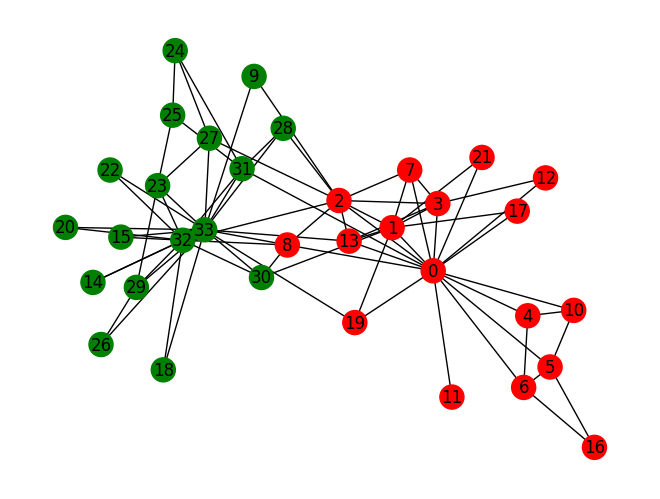

In [3]:
# We use matplotlib to showcase the result below.
karate_data = nx.karate_club_graph()
club = {node: karate_data.nodes[node]["club"] for node in karate_data.nodes()}
nx.set_node_attributes(karate_data, club, "club")
color = []
for node in karate_data.nodes():
    if club[node] == "Mr. Hi":
        color.append("red")
    else:
        color.append("green")
config = {
    "Node color": color,
    "Node size": 1,
    "Node stroke width": 0,
    "Edge width": 1,
    "Zoom": 0.5,
}
MrHi = []
Officer = []
for i in range(len(color)):
    if club[i] == "Mr. Hi":
        MrHi.append(i)
    else:
        Officer.append(i)
nx.draw(karate_data, with_labels=True, node_color=color)
plt.show()
#nw.visualize(karate_data, config=config)


In [4]:
def calculate_modularity(karate_data, communities):
    total_edges = karate_data.number_of_edges()
    modularity_score = 0.0
    for community in communities:
        edges_within_community = karate_data.subgraph(community).number_of_edges()
        sum_of_degrees_in_community = sum(karate_data.degree(node) for node in community)
        proportion_of_edges_within_community = edges_within_community / total_edges
        proportion_of_sum_of_degrees = (sum_of_degrees_in_community / (2 * total_edges)) ** 2
        modularity_score += proportion_of_edges_within_community - proportion_of_sum_of_degrees
    return modularity_score

num_edges = karate_data.number_of_edges() * 2

def double_edge_swap_algorithm(original_graph, num_swaps):
    graph_copy = original_graph.copy()
    for i in range(num_swaps):
        edge1 = random.choice(list(graph_copy.edges()))
        edge2 = random.choice(list(graph_copy.edges()))
        u, v = edge1
        x, y = edge2
        if (u != x) and (v != y) and (not graph_copy.has_edge(u, y)) and (not graph_copy.has_edge(x, v)):
            graph_copy.remove_edges_from([edge1, edge2])
            graph_copy.add_edges_from([(u, y), (x, v)])

    return graph_copy

Modularity is the measure of how well a network is divided into different communities or groups. The higher the value of the modularity, the more connections and density is in that network.

In [38]:
current_communities = [Officer, MrHi]
modularity_from_current_communities = calculate_modularity(karate_data, current_communities)
print("Current modularity:", modularity_from_current_communities)

Current modularity: 0.3582347140039447


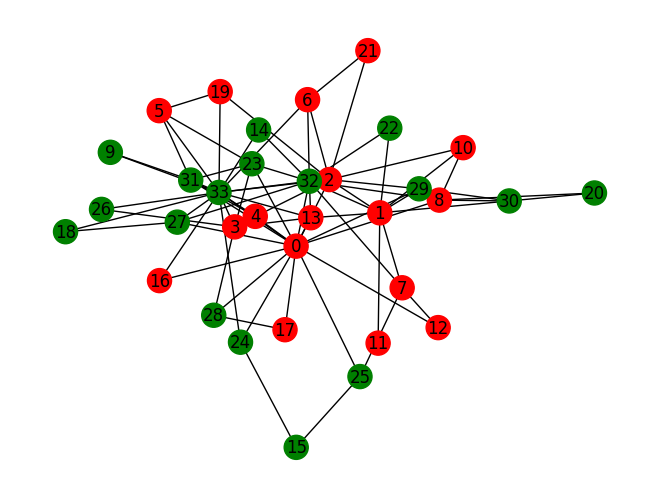

In [39]:
karate_data_double_edge_swap = double_edge_swap_algorithm(karate_data, num_edges)
nx.draw(karate_data_double_edge_swap, with_labels=True, node_color=color)
plt.show()  

In [40]:
original_degrees = [degree for node, degree in karate_data.degree()]
new_degrees = [degree for node, degree in karate_data_double_edge_swap.degree()]
print("Original:", original_degrees)
print("New     :", new_degrees)

errors = sum([1 for i in range(len(original_degrees)) if original_degrees[i] != new_degrees[i]])
print("Errors:", errors)
print("double_edge_swap modularity:", calculate_modularity(karate_data_double_edge_swap, current_communities))

Original: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
New     : [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Errors: 0
double_edge_swap modularity: 0.024901380670611373


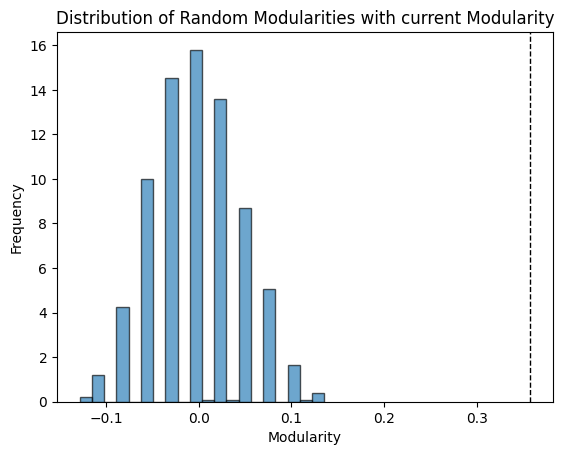

mean: -5.794496878419439e-05
std: 0.046576619675799416
current_Modularity: 0.3582347140039447
Modularity value is significantly different


In [18]:
num_iterations = 1000
modularities = []
for i in range(num_iterations):
        current_graph = double_edge_swap_algorithm(karate_data, num_edges)
        current_modularity = calculate_modularity(current_graph, current_communities)
        modularities.append(current_modularity)
mean = np.mean(modularities)
std = np.std(modularities)
plt.hist(modularities, bins=20, alpha=0.65, density=True,edgecolor='k')
plt.axvline(x=modularity_from_current_communities, color='k',linestyle='dashed', linewidth=1)
plt.xlabel('Modularity')
plt.ylabel('Frequency')
plt.title('Distribution of Random Modularities with current Modularity')
plt.show()
print("mean:", mean)
print("std:", std)
print("current_Modularity:",modularity_from_current_communities)
if modularity_from_current_communities < mean - 2 * std or modularity_from_current_communities > mean + 2 * std:
    print("Modularity value is significantly different")
else: 
    print("Modularity value is not significantly different")

It can be seen that since the modularity is very different, we can observe that this partitioning is far superior to random partitioning.

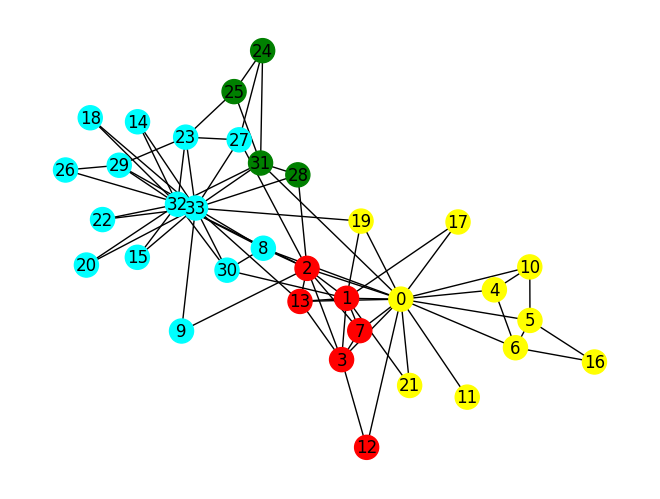

Louvain: 0.42662243960945256
current_Modularity: 0.3582347140039447


In [21]:
#Louvain-algorithm implementation

partition = community_louvain.best_partition(karate_data)

louvain_colors = ["green", "red", "yellow", "cyan"]
node_color = [louvain_colors[partition[i]] for i in range(len(karate_data.nodes()))]

nx.draw(karate_data, with_labels=True, node_color=node_color)

plt.show()
louvain_molarities = community_louvain.modularity(partition,karate_data)
print("Louvain:",louvain_molarities)
print("current_Modularity:",modularity_from_current_communities)

That implies that the Louvain approach discovered a better community structure for the network in issue than the other techniques utilized. It might also imply that the Louvain technique is better suited to evaluating the specific sort of network under consideration.

Text(0, 0.5, 'Club')

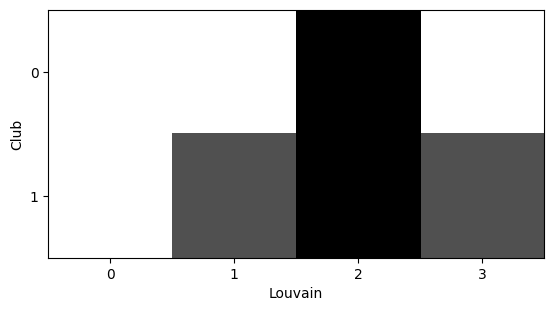

In [22]:
D = np.ndarray((2, 4))

for i in range(len(current_communities)):
    current_club = current_communities[i]
    for j in range(len(partition)):
        current_partition = partition[j]
        if isinstance(current_partition, list):
            alike = sum([True for x in range(len(current_partition)) if current_partition[x] in current_club])
            D[i, j] = alike

plt.imshow(D, cmap='Greys')
plt.yticks([0, 1])
plt.xticks([0, 1, 2, 3])
plt.xlabel("Louvain")
plt.ylabel("Club")

It seems that the Louvain groups split into 4 groups where 2 of them still is very big while other 2 are very small.

### Exercise 3: Community detection on the network of Computational Social Scientists

In [23]:
import pickle
from networkx.algorithms import community

with open('week4graph.pickle', 'rb') as f:
    G = pickle.load(f)

nx_G = nx.Graph()
nx_G.add_nodes_from(G.nodes())
nx_G.add_edges_from(G.edges())

num_communities:126 


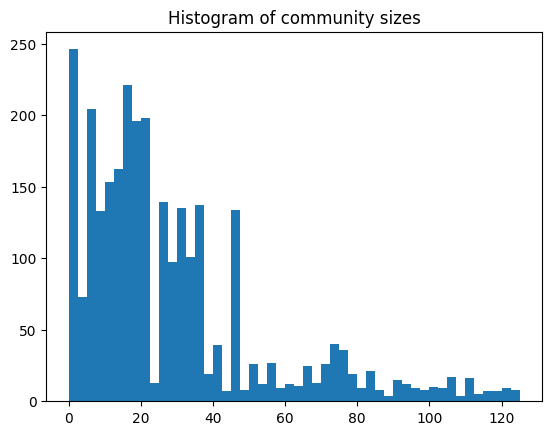

In [24]:
best_partition = community_louvain.best_partition(G)
communities_generator = community.girvan_newman(G)

print(f'num_communities:{max(best_partition.values()) + 1} ')

plt.hist(best_partition.values(), bins = 50)
plt.title('Histogram of community sizes')
plt.show()

Number of communities is 125 and their sizes can be visualized in histogram above. The modularity is calculated below e 0.28~

In [25]:
communities = {}
for node in best_partition:
    if best_partition[node] not in communities:
        communities[best_partition[node]] = [node]
    else:
        communities[best_partition[node]].append(node)

def modularity(G, communities):
    m = G.number_of_edges()
    q = 0.0
    for c in communities:
        lc = len(communities[c])
        kc = sum(G.degree(n) for n in communities[c])
        q += lc/m - (kc/(2*m))**2
    return q

q = modularity(G, communities)
print(f'modularity:{q}')

modularity:0.28033051155870614


In [43]:
num_edges_com = nx_G.number_of_edges() * 2
d = double_edge_swap_algorithm(nx_G, num_edges_com)

Due to number of communities created and a molarity that is above 0, it can be said that the molarity is significantly different than 0.

In [26]:
from matplotlib import colors as colors

num_communities = max(best_partition.values()) + 1
community_colors = {i: f'#{j:x}' for i, j in zip(range(num_communities), np.random.randint(256**3, size=num_communities))}

node_colors = [community_colors[best_partition[node]] for node in G.nodes()]
config = { "Node color": node_colors, "Node size": 1, "Node stroke width": 0, "Edge width": 1,"Zoom": 0.5,}
#nw.visualize(nx_G,config=config)

For some reason does the color of the communities not show in our netwulf. The graph can be seen to showcase what would look like a big circle. The edge of this circle shows alot of communities with only a few links to one another. While the majority of the inside of the network seems to have communities with alot of connections to one another.

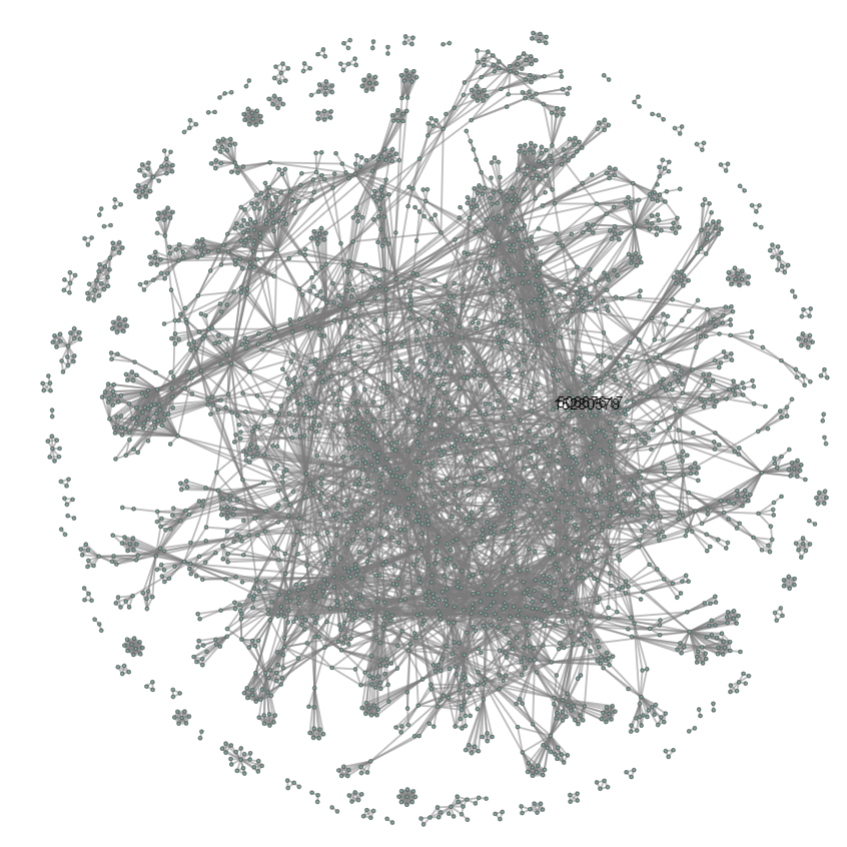

In [28]:
communities = {i: [] for i in set(best_partition.values())}
for node, comm in best_partition.items():
    communities[comm].append(node)
with open('communities.json', 'w') as f:
    json.dump(communities, f)    